C:\Users\User\AppData\Local\Temp\ipykernel_5696\3328840544.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


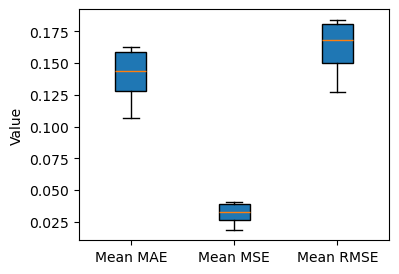

In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"

# Initialize list to store epoch data
epoch_data = []

# Process each JSON file
for file in os.listdir(folder_path):
    if file.endswith(".json"):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Initialize lists to store metrics for the epoch
        mae_list = []  # Mean Absolute Error
        mse_list = []  # Mean Squared Error
        rmse_list = []  # Root Mean Squared Error
        
        # Extract data from each step (assuming each step contains 'actions_pred' and 'labels')
        for step in data.get('steps', []):  # Safely handle missing 'steps'
            if 'actions_pred' in step and 'labels' in step:
                actions_pred = np.array(step['actions_pred']).flatten()
                labels = np.array(step['labels']).flatten()

                # Calculate MAE, MSE, RMSE
                mae = np.mean(np.abs(actions_pred - labels))
                mse = np.mean((actions_pred - labels) ** 2)
                rmse = np.sqrt(mse)
                
                # Append to lists
                mae_list.append(mae)
                mse_list.append(mse)
                rmse_list.append(rmse)

        # Compute epoch-level summary
        epoch_summary = {
            'Epoch': file.split('.')[0],  # Use file name as epoch identifier
            'Mean_MAE': np.mean(mae_list) if mae_list else 0,
            'Mean_MSE': np.mean(mse_list) if mse_list else 0,
            'Mean_RMSE': np.mean(rmse_list) if rmse_list else 0,
            'Median_MAE': np.median(mae_list) if mae_list else 0,
            'Median_MSE': np.median(mse_list) if mse_list else 0,
            'Median_RMSE': np.median(rmse_list) if rmse_list else 0,
        }
        epoch_data.append(epoch_summary)

# Save the collected data to a CSV file
csv_file = "epoch_summary.csv"
df = pd.DataFrame(epoch_data)
df.to_csv(csv_file, index=False)

# Plotting MAE, MSE, and RMSE as box plots
plt.figure(figsize=(4, 3))

# Combine the metrics data for the box plot
plt.boxplot(
    [df['Mean_MAE'], df['Mean_MSE'], df['Mean_RMSE']],
    vert=True,
    patch_artist=True,
    labels=['Mean MAE', 'Mean MSE', 'Mean RMSE']
)

# Add titles and labels
# plt.title('MAE, MSE, and RMSE Box Plot')
plt.ylabel('Value')
#plt.grid(True)

# Save and show the plot
plt.savefig('mae_mse_rmse_boxplot.png')  # Save the plot as PNG
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14572\3817685681.py:58: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


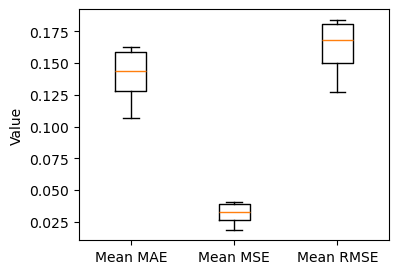

In [45]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"

# Initialize list to store epoch data
epoch_data = []

# Process each JSON file
for file in os.listdir(folder_path):
    if file.endswith(".json"):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Initialize lists to store metrics for the epoch
        mae_list = []  # Mean Absolute Error
        mse_list = []  # Mean Squared Error
        rmse_list = []  # Mean roor Squared Error
        # Extract data from each step (assuming each step contains 'actions_pred' and 'labels')
        for step in data.get('steps', []):  # Safely handle missing 'steps'
            if 'actions_pred' in step and 'labels' in step:
                actions_pred = np.array(step['actions_pred']).flatten()
                labels = np.array(step['labels']).flatten()

                # Calculate MAE and MSE
                mae = np.mean(np.abs(actions_pred - labels))
                mse = np.mean((actions_pred - labels) ** 2)
                rmse = np.sqrt(mse)
                
                # Append to lists
                mae_list.append(mae)
                mse_list.append(mse)
                rmse_list.append(rmse)

        # Compute epoch-level summary
        epoch_summary = {
            'Epoch': file.split('.')[0],  # Use file name as epoch identifier
            'Mean_MAE': np.mean(mae_list) if mae_list else 0,
            'Mean_MSE': np.mean(mse_list) if mse_list else 0,
            'Mean_RMSE': np.mean(rmse_list) if rmse_list else 0,
        }
        epoch_data.append(epoch_summary)

# Save the collected data to a CSV file
csv_file = "epoch_summary.csv"
df = pd.DataFrame(epoch_data)
df.to_csv(csv_file, index=False)

# Plotting MAE and MSE as box plots
plt.figure(figsize=(4, 3))

# Combine the metrics data for the box plot
plt.boxplot(
    [df['Mean_MAE'], df['Mean_MSE'], df['Mean_RMSE']],
    vert=True,
    labels=['Mean MAE', 'Mean MSE', 'Mean RMSE']
)

# Add titles and labels
#plt.title('MAE and MSE Box Plot')
plt.ylabel('Value')
#plt.grid(True)

# Save and show the plot
plt.savefig('mae_mse_boxplot.png')  # Save the plot as PNG
plt.show()


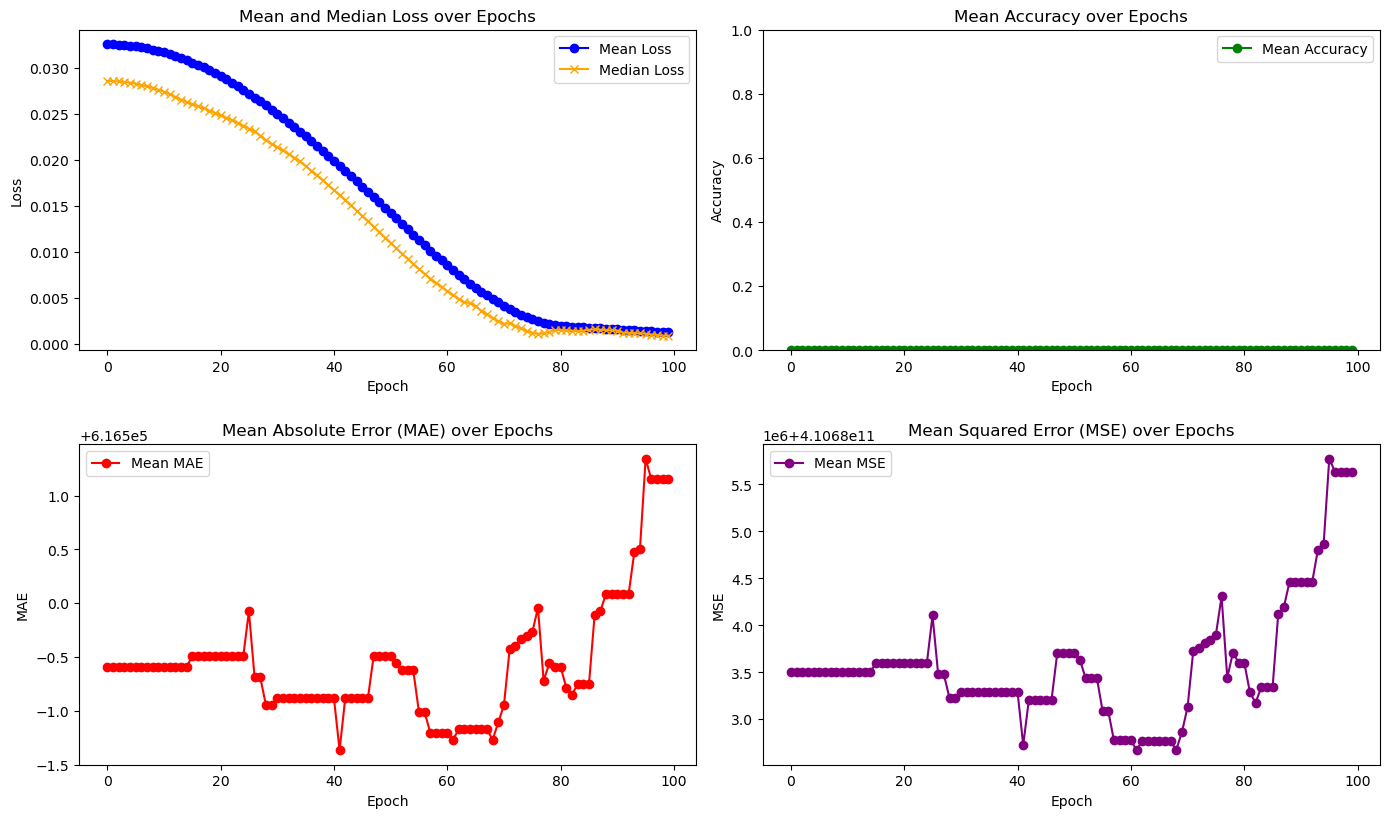

In [11]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the function to convert actions to classes
def convert_to_classes(action):
    """
    Convert action values into discrete classes.
    """
    return int(round(action))

# Define the directory containing the log files
log_dir = r'C:\Users\User\Documents\ADR\Log Viz\llama_log_train'

# Initialize lists to store the data
epoch_numbers = []
mean_losses = []
median_losses = []
mean_accuracies = []
mean_mae = []
mean_mse = []

# Read all the custom_logs_epoch_train_*.json files
log_files = [f for f in os.listdir(log_dir) if f.startswith('custom_logs_epoch_train_') and f.endswith('.json')]

# Sort the log files based on the epoch number
log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Loop through each log file and extract relevant metrics
for log_file in log_files:
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    epoch_numbers.append(epoch_number)

    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)
        
        losses = [step.get('train_loss', np.nan) for step in data.get('steps', [])]
        actions_preds = [step.get('actions_pred', []) for step in data.get('steps', [])]
        actions = [step.get('actions', []) for step in data.get('steps', [])]
        
        # Calculate mean and median losses
        mean_loss = np.nanmean(losses)
        median_loss = np.nanmedian(losses)
        mean_losses.append(mean_loss)
        median_losses.append(median_loss)

        # Calculate accuracy, MAE, and MSE
        accuracies = []
        mae_list = []
        mse_list = []
        
        for preds, true_actions in zip(actions_preds, actions):
            preds_array = np.array(preds)
            true_actions_array = np.array(true_actions)

            if preds_array.size == 0 or true_actions_array.size == 0:
                continue  # Skip if data is missing

            true_actions_classes = np.vectorize(convert_to_classes)(true_actions_array.flatten())
            preds_indices = preds_array.argmax(axis=1).flatten()
            
            # Accuracy
            accuracy = (preds_indices == true_actions_classes).mean()
            accuracies.append(accuracy)

            # MAE and MSE
            mae = np.abs(preds_indices - true_actions_classes).mean()
            mse = np.square(preds_indices - true_actions_classes).mean()
            mae_list.append(mae)
            mse_list.append(mse)

        mean_accuracy = np.mean(accuracies) if accuracies else 0
        mean_accuracies.append(mean_accuracy)

        mean_mae.append(np.mean(mae_list) if mae_list else np.nan)
        mean_mse.append(np.mean(mse_list) if mse_list else np.nan)

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Epoch': epoch_numbers,
    'Mean Loss': mean_losses,
    'Median Loss': median_losses,
    'Mean Accuracy': mean_accuracies,
    'Mean MAE': mean_mae,
    'Mean MSE': mean_mse,
})

# Plotting
plt.figure(figsize=(14, 12))

# Plot Mean Loss and Median Loss
plt.subplot(3, 2, 1)
plt.plot(df['Epoch'], df['Mean Loss'], marker='o', label='Mean Loss', color='blue')
plt.plot(df['Epoch'], df['Median Loss'], marker='x', label='Median Loss', color='orange')
plt.title('Mean and Median Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Mean Accuracy
plt.subplot(3, 2, 2)
plt.plot(df['Epoch'], df['Mean Accuracy'], marker='o', label='Mean Accuracy', color='green')
plt.title('Mean Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.legend()

# Plot Mean MAE
plt.subplot(3, 2, 3)
plt.plot(df['Epoch'], df['Mean MAE'], marker='o', label='Mean MAE', color='red')
plt.title('Mean Absolute Error (MAE) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# Plot Mean MSE
plt.subplot(3, 2, 4)
plt.plot(df['Epoch'], df['Mean MSE'], marker='o', label='Mean MSE', color='purple')
plt.title('Mean Squared Error (MSE) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# No grid in the plots
plt.tight_layout()
plt.show()


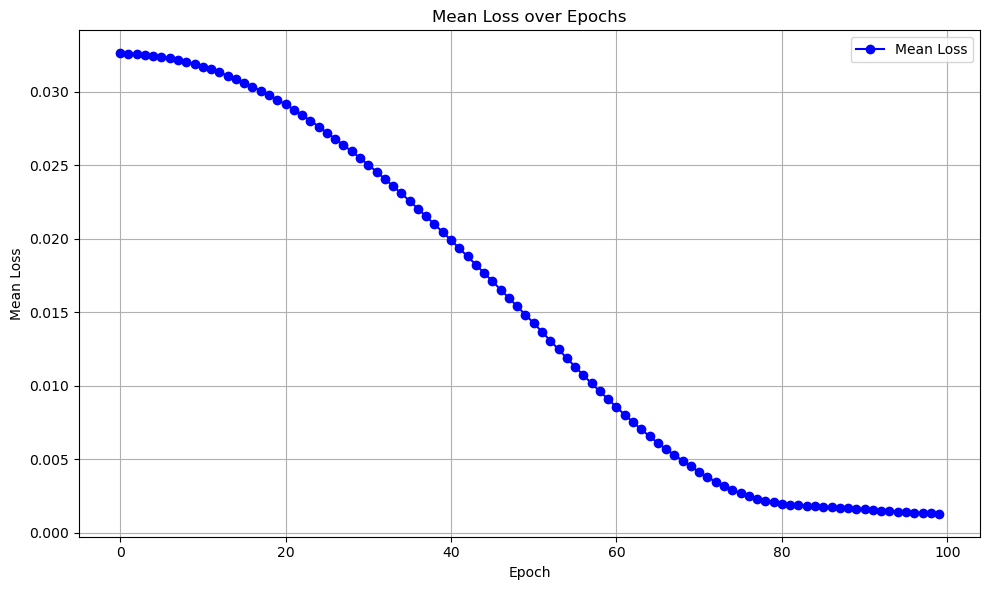

In [14]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the directory containing the log files
log_dir = r'C:\Users\User\Documents\ADR\Log Viz\llama_log_train'

# Initialize lists to store the data
epoch_numbers = []
mean_losses = []

# Read all the custom_logs_epoch_train_*.json files
log_files = [f for f in os.listdir(log_dir) if f.startswith('custom_logs_epoch_train_') and f.endswith('.json')]

# Sort the log files based on the epoch number
log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Loop through each log file and extract relevant metrics
for log_file in log_files:
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    epoch_numbers.append(epoch_number)

    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)
        
        losses = [step.get('train_loss', np.nan) for step in data.get('steps', [])]
        
        # Calculate mean loss
        mean_loss = np.nanmean(losses)
        mean_losses.append(mean_loss)

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Epoch': epoch_numbers,
    'Mean Loss': mean_losses
})

# Plotting Mean Loss
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Mean Loss'], marker='o', label='Mean Loss', color='blue')
plt.title('Mean Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14572\2928721882.py:24: RuntimeWarning: Mean of empty slice
  mean_loss = np.nanmean(losses)


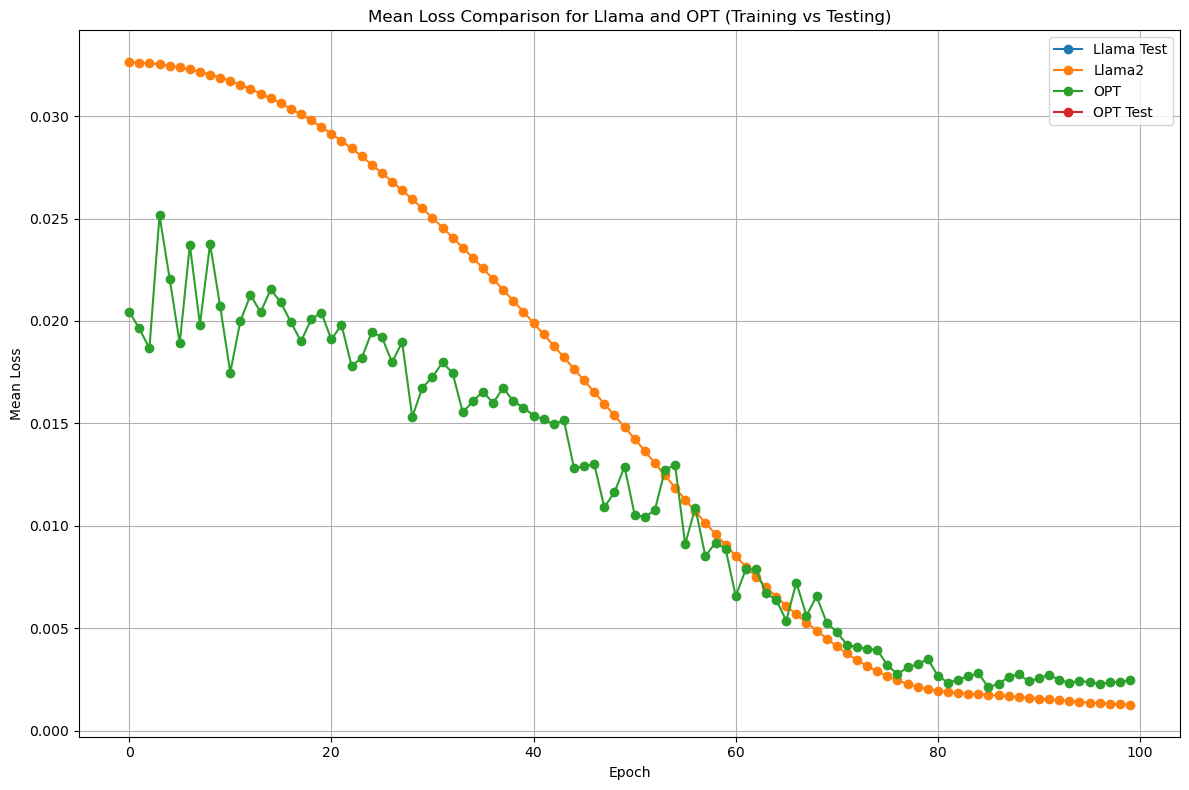

In [35]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to extract mean loss data from log files (training or testing)
def extract_mean_loss(log_dir, file_prefix, label):
    epoch_numbers = []
    mean_losses = []

    # Read all the relevant JSON files
    log_files = [f for f in os.listdir(log_dir) if f.startswith(file_prefix) and f.endswith('.json')]
    log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

    # Loop through each log file and extract the mean loss
    for log_file in log_files:
        epoch_number = int(log_file.split('_')[-1].split('.')[0])
        epoch_numbers.append(epoch_number)

        with open(os.path.join(log_dir, log_file), 'r') as file:
            data = json.load(file)
            losses = [step.get('train_loss', np.nan) for step in data.get('steps', [])]
            mean_loss = np.nanmean(losses)
            mean_losses.append(mean_loss)

    # Return a DataFrame with a new 'Type' column indicating the dataset (Training/Testing and Llama/OPT)
    return pd.DataFrame({'Epoch': epoch_numbers, 'Mean Loss': mean_losses, 'Type': label})

# Define paths to the base directories
base_dirs = {
    'Llama2': r'C:\Users\User\Documents\ADR\Log Viz\llama_log_train',
    'Llama Test': r'C:\Users\User\Documents\ADR\Viz Testing\test_log_data',
    'OPT': r'C:\Users\User\Documents\ADR\Log Viz\train_log_data3',
    'OPT Test': r'C:\Users\User\Documents\ADR\Viz Testing\opt_test_logs_data' 
}

# Define file prefixes for training and testing logs
file_prefixes = {
    'Llama2': 'custom_logs_epoch_train_',
    'Llama Test': 'custom_logs_epoch_test_',
    'OPT': 'custom_logs_epoch_train_',
    'OPT Test': 'custom_logs_epoch_test_'
}

# Collect mean loss data for both training and testing of both Llama and OPT
all_data = []

for label, folder in base_dirs.items():
    if os.path.exists(folder):  # Check if the folder exists
        prefix = file_prefixes[label]
        data = extract_mean_loss(folder, prefix, label)
        all_data.append(data)
    else:
        print(f"Folder not found: {folder}")

# Combine all data into one DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Plotting
plt.figure(figsize=(12, 8))

# Plot each type of loss on the same plot
for label, group_data in combined_data.groupby('Type'):
    plt.plot(group_data['Epoch'], group_data['Mean Loss'], marker='o', label=label)

# Add titles and labels
plt.title('Mean Loss Comparison for Llama and OPT (Training vs Testing)')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


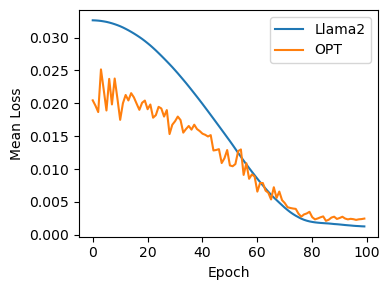

In [44]:
# Plotting only the training loss for Llama and OPT in solid lines
plt.figure(figsize=(4,3))

# Filter the data to include only training data
training_data = combined_data[combined_data['Type'].isin(['Llama2', 'OPT'])]

# Plot each type of training loss with a solid line
for label, group_data in training_data.groupby('Type'):
    plt.plot(group_data['Epoch'], group_data['Mean Loss'], linestyle='-', label=label)

# Add titles and labels
# plt.title(False)
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


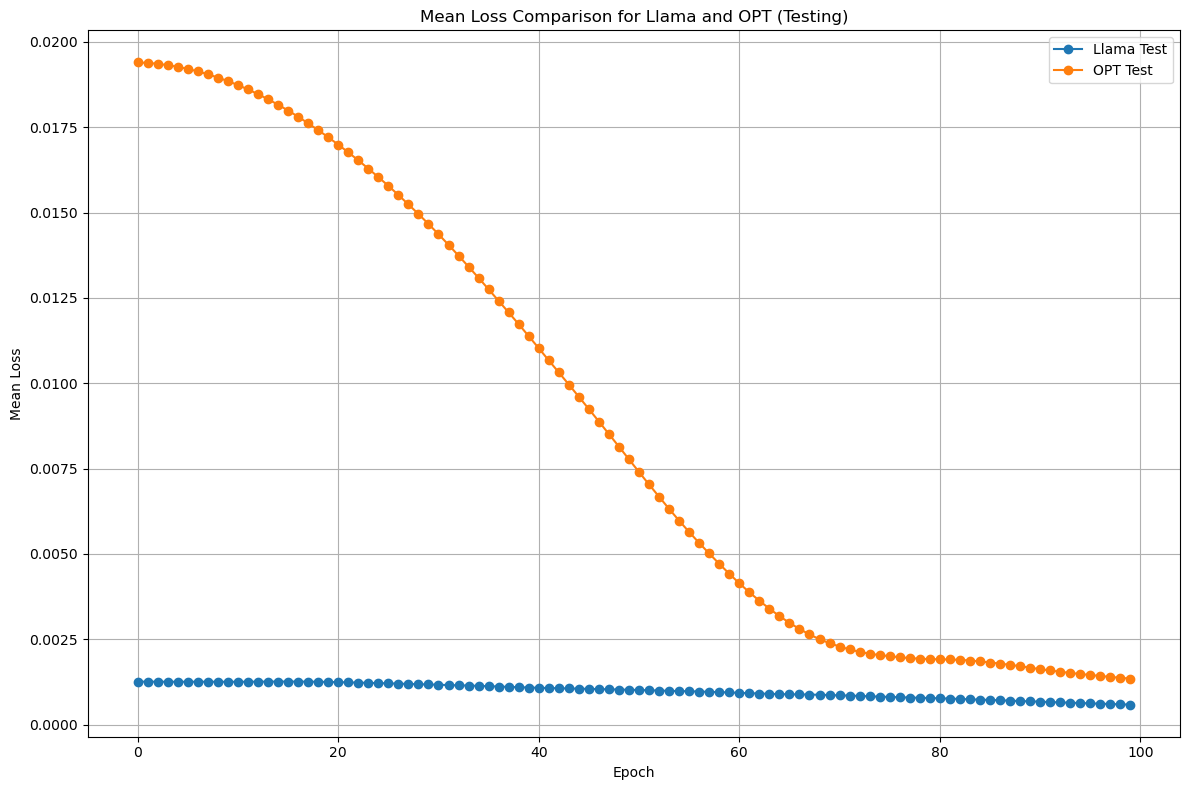

In [22]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to extract mean loss data from log files (testing only)
def extract_mean_loss(log_dir, file_prefix, label):
    epoch_numbers = []
    mean_losses = []

    # Read all the relevant JSON files
    log_files = [f for f in os.listdir(log_dir) if f.startswith(file_prefix) and f.endswith('.json')]
    log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

    # Loop through each log file and extract the mean loss
    for log_file in log_files:
        epoch_number = int(log_file.split('_')[-1].split('.')[0])
        epoch_numbers.append(epoch_number)

        with open(os.path.join(log_dir, log_file), 'r') as file:
            data = json.load(file)
            # Focus on 'test_loss' for testing logs
            losses = [step.get('test_loss', np.nan) for step in data.get('steps', [])]
            mean_loss = np.nanmean(losses) if losses else np.nan  # Handle empty loss lists
            mean_losses.append(mean_loss)

    # Return a DataFrame with a new 'Type' column indicating the dataset (Llama/OPT)
    return pd.DataFrame({'Epoch': epoch_numbers, 'Mean Loss': mean_losses, 'Type': label})

# Define paths to the base directories
base_dirs = {
    'Llama Test': r'C:\Users\User\Documents\ADR\Viz Testing\test_log_data',
    'OPT Test': r'C:\Users\User\Documents\ADR\Viz Testing\opt_test_logs_data' 
}

# Define file prefixes for testing logs
file_prefixes = {
    'Llama Test': 'custom_logs_epoch_test_',
    'OPT Test': 'custom_logs_epoch_test_'
}

# Collect mean loss data for testing of both Llama and OPT
all_data = []

for label, folder in base_dirs.items():
    if os.path.exists(folder):  # Check if the folder exists
        prefix = file_prefixes[label]
        data = extract_mean_loss(folder, prefix, label)
        all_data.append(data)
    else:
        print(f"Folder not found: {folder}")

# Combine all data into one DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Plotting
plt.figure(figsize=(12, 8))

# Plot each type of loss on the same plot
for label, group_data in combined_data.groupby('Type'):
    plt.plot(group_data['Epoch'], group_data['Mean Loss'], marker='o', label=label)

# Add titles and labels
plt.title('Mean Loss Comparison for Llama and OPT (Testing)')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


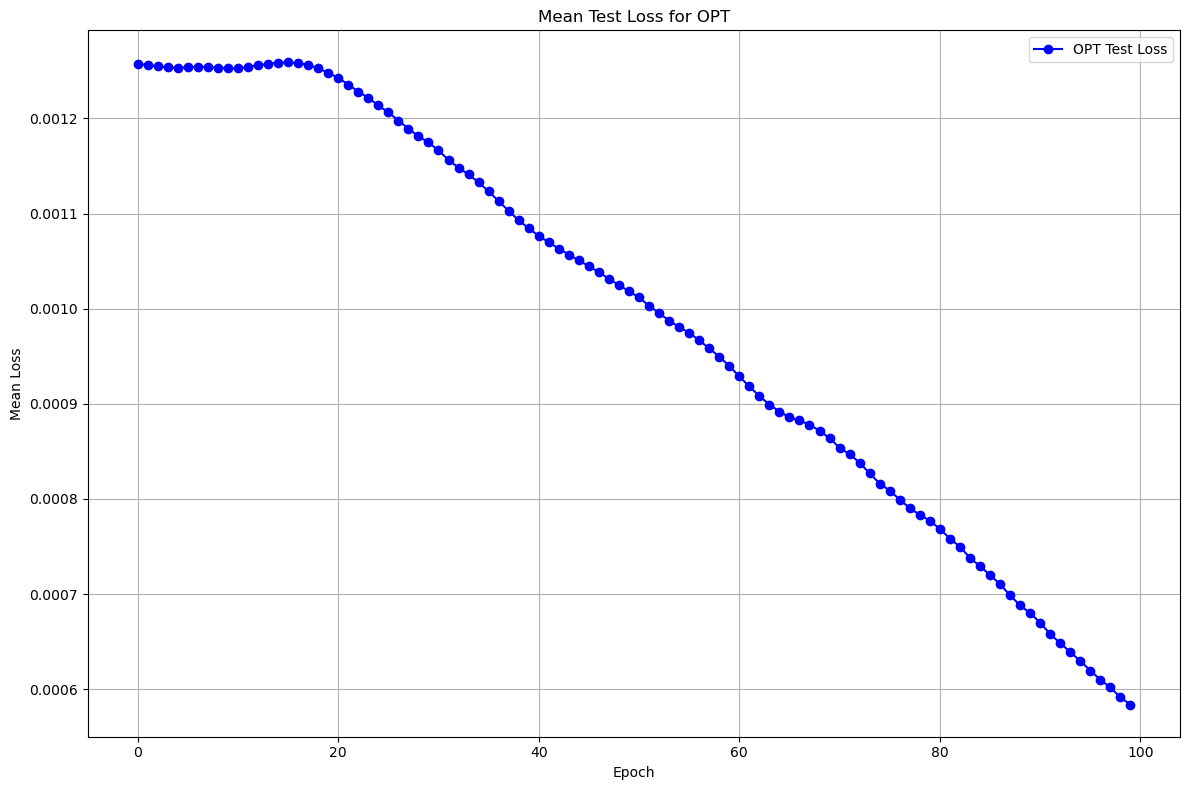

In [24]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to extract mean loss data from OPT testing log files
def extract_mean_loss(log_dir, file_prefix, label):
    epoch_numbers = []
    mean_losses = []

    # Read all the relevant JSON files
    log_files = [f for f in os.listdir(log_dir) if f.startswith(file_prefix) and f.endswith('.json')]
    log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

    # Loop through each log file and extract the mean loss
    for log_file in log_files:
        epoch_number = int(log_file.split('_')[-1].split('.')[0])
        epoch_numbers.append(epoch_number)

        with open(os.path.join(log_dir, log_file), 'r') as file:
            data = json.load(file)
            # Focus on 'test_loss' for testing logs
            losses = [step.get('test_loss', np.nan) for step in data.get('steps', [])]
            mean_loss = np.nanmean(losses) if losses else np.nan  # Handle empty loss lists
            mean_losses.append(mean_loss)

    # Return a DataFrame with a new 'Type' column indicating the dataset (OPT)
    return pd.DataFrame({'Epoch': epoch_numbers, 'Mean Loss': mean_losses, 'Type': label})

# Define paths to the base directories
base_dirs = {
    'OPT Test': r'C:\Users\User\Documents\ADR\Viz Testing\test_log_data' 
}

# Define file prefix for testing logs (OPT only)
file_prefixes = {
    'OPT Test': 'custom_logs_epoch_test_'
}

# Collect mean loss data for testing of OPT
all_data = []

for label, folder in base_dirs.items():
    if os.path.exists(folder):  # Check if the folder exists
        prefix = file_prefixes[label]
        data = extract_mean_loss(folder, prefix, label)
        all_data.append(data)
    else:
        print(f"Folder not found: {folder}")

# Combine all data into one DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Plotting OPT Test Loss
plt.figure(figsize=(12, 8))

# Plot the mean test loss of OPT
plt.plot(combined_data['Epoch'], combined_data['Mean Loss'], marker='o', label='OPT Test Loss', color='blue')

# Add titles and labels
plt.title('Mean Test Loss for OPT')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


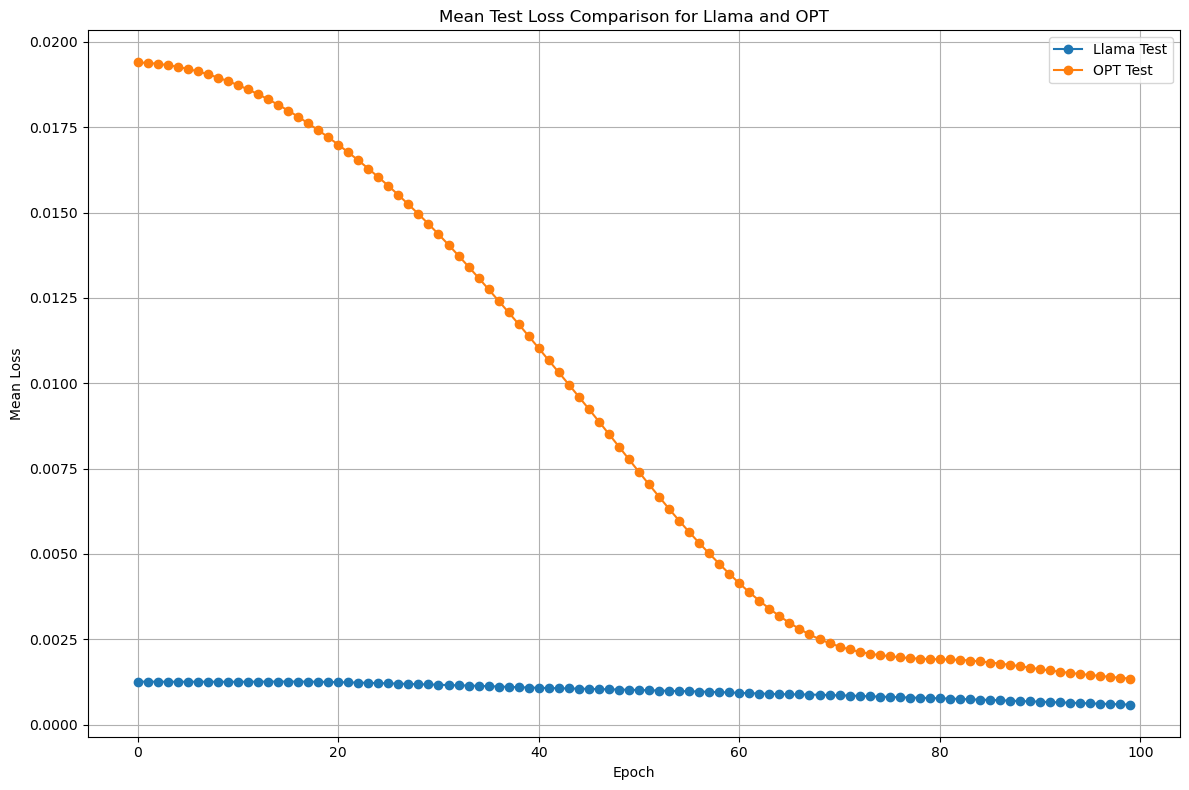

In [25]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to extract mean loss data from log files (testing for both OPT and Llama)
def extract_mean_loss(log_dir, file_prefix, label):
    epoch_numbers = []
    mean_losses = []

    # Read all the relevant JSON files
    log_files = [f for f in os.listdir(log_dir) if f.startswith(file_prefix) and f.endswith('.json')]
    log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

    # Loop through each log file and extract the mean loss
    for log_file in log_files:
        epoch_number = int(log_file.split('_')[-1].split('.')[0])
        epoch_numbers.append(epoch_number)

        with open(os.path.join(log_dir, log_file), 'r') as file:
            data = json.load(file)
            # Focus on 'test_loss' for testing logs
            losses = [step.get('test_loss', np.nan) for step in data.get('steps', [])]
            mean_loss = np.nanmean(losses) if losses else np.nan  # Handle empty loss lists
            mean_losses.append(mean_loss)

    # Return a DataFrame with a new 'Type' column indicating the dataset (OPT or Llama)
    return pd.DataFrame({'Epoch': epoch_numbers, 'Mean Loss': mean_losses, 'Type': label})

# Define paths to the base directories
base_dirs = {
    'Llama Test': r'C:\Users\User\Documents\ADR\Viz Testing\test_log_data',
    'OPT Test': r'C:\Users\User\Documents\ADR\Viz Testing\opt_test_logs_data' 
}

# Define file prefixes for testing logs (Llama and OPT)
file_prefixes = {
    'Llama Test': 'custom_logs_epoch_test_',
    'OPT Test': 'custom_logs_epoch_test_'
}

# Collect mean loss data for both Llama and OPT testing
all_data = []

for label, folder in base_dirs.items():
    if os.path.exists(folder):  # Check if the folder exists
        prefix = file_prefixes[label]
        data = extract_mean_loss(folder, prefix, label)
        all_data.append(data)
    else:
        print(f"Folder not found: {folder}")

# Combine all data into one DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Plotting
plt.figure(figsize=(12, 8))

# Plot each type of loss on the same plot
for label, group_data in combined_data.groupby('Type'):
    plt.plot(group_data['Epoch'], group_data['Mean Loss'], marker='o', label=label)

# Add titles and labels
plt.title('Mean Test Loss Comparison for Llama and OPT')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


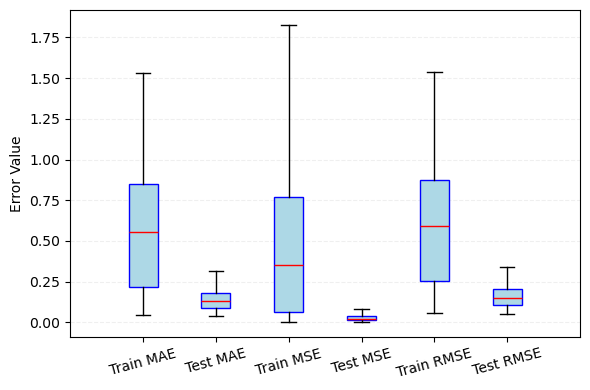

In [19]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define folders for training and testing data
test_folder = r"C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"
train_folder = r"C:\Users\User\Documents\ADR\Log Viz\llama_log_train"

# Function to process JSON files and extract error metrics
def process_json_files(folder_path):
    metrics = {'MAE': [], 'MSE': [], 'RMSE': []}

    for file in os.listdir(folder_path):
        if file.endswith(".json"):
            file_path = os.path.join(folder_path, file)
            with open(file_path, 'r') as f:
                data = json.load(f)

            # Extract metrics for each step
            for step in data.get('steps', []):
                if 'actions_pred' in step and 'labels' in step:
                    actions_pred = np.array(step['actions_pred']).flatten()
                    labels = np.array(step['labels']).flatten()

                    # Calculate MAE, MSE, RMSE
                    mae = np.mean(np.abs(actions_pred - labels))
                    mse = np.mean((actions_pred - labels) ** 2)
                    rmse = np.sqrt(mse)

                    # Append metrics
                    metrics['MAE'].append(mae)
                    metrics['MSE'].append(mse)
                    metrics['RMSE'].append(rmse)
    return metrics

# Option 1: Cap outliers
def cap_outliers(data):
    capped_data = {}
    for key, values in data.items():
        q1 = np.percentile(values, 25)
        q3 = np.percentile(values, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        capped_data[key] = [max(lower_bound, min(v, upper_bound)) for v in values]
    return capped_data

# Process training and testing folders
train_metrics = process_json_files(train_folder)
test_metrics = process_json_files(test_folder)

# Apply either capping or whisker range adjustments
train_metrics_capped = cap_outliers(train_metrics)
test_metrics_capped = cap_outliers(test_metrics)

# Create boxplots for comparison
plt.figure(figsize=(6, 4))

# Combine training and testing metrics
data = [
    train_metrics_capped['MAE'], test_metrics_capped['MAE'],  # MAE
    train_metrics_capped['MSE'], test_metrics_capped['MSE'],  # MSE
    train_metrics_capped['RMSE'], test_metrics_capped['RMSE'] # RMSE
]

# Boxplot positions and labels
positions = [1, 1.5, 2, 2.5, 3, 3.5]
labels = ['Train MAE', 'Test MAE', 'Train MSE', 'Test MSE', 'Train RMSE', 'Test RMSE']

# Plot the boxplots with adjusted whiskers
plt.boxplot(
    data,
    positions=positions,
    patch_artist=True,
    widths=0.2,
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red'),
    whis=[0, 100]  # Extend whiskers to min and max
)

# Adjust x-axis
plt.xticks(positions, labels, rotation=15)

# Titles and labels
# plt.title('Comparison of MAE, MSE, RMSE for Training and Testing (No Outliers)')
plt.ylabel('Error Value')

# Grid and save the plot
plt.grid(axis='y', linestyle='--', alpha= 0.2)
plt.tight_layout()
plt.savefig('error_comparison_boxplot_no_outliers.png')
plt.show()
